In [ ]:
# !pip install control # For Google Colab only

import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Những thứ cần phải xem trước khi làm bài

1. Con lắc ngược, động học con lắc ngược (hiểu đại khái những dữ kiện đầu bài cho là gì)
2. Inverted Pendulum MPC with State Space Model: https://www.youtube.com/watch?v=egPRF5PHwOo&t=21s
3. Còn lại thì tùy cơ ứng biến

# Advanced Dynamical Systems Control

Consider the following inverted pendulum system,

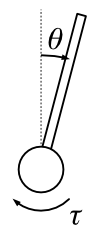

where $\theta$ is the pendulum angle (góc tạo bởi con lắc so với phương thẳng đứng), $\tau$ is the input torque (moment xoắn đầu vào), $m$, $l$, $J$ are the pendulm mass (khôi lượng), length (chiều dài từ đầu con lắc đến tâm quả nặng) and inertia (quán tính) respectively.

The viscous firiction coefficient (hệ số ma sát nhớt) is given by $\mu$ and the gravity acceleration (gia tốc trọng trường) is given by $g$.

Then, the dynamics of the system is written in the follows (động lực học của hê thống được viêts như sau).

$J\ddot{\theta}(t)+\mu\dot{\theta}(t)=mgl\sin\theta(t) + \tau $

## TASK 1

1. Rewrite the system in a state-space form. Assume the input is $\tau$ and the output is $\theta$. 
=> Mô tả hệ thống dưới dạng không gian-trạng thái. Đầu vào là $\tau$ và đầu ra là góc $\theta$
2. Discretize the system by sampling period 1 ms. 
=>phân biệt hệ thống theo chu kỳ lấy mẫu 1ms
3. Design a state feedback controller for the discritized system to be stable.
=>Thiết kế bộ điều khiển phản hồi trạng thái để hệ thống phân biệt được ổn định.
4. Show the input/output responce of the stabilized system where the initial angle is $\theta=0.5$ [rad] and the initial angle speed is $\dot{\theta}=0$. (It means time series graphs of  and are needed.) 
=> Hiển thị phản hồi đầu ra, đầu vào của hệ thống, trong đó góc ban đầu là $\theta=0.5$ [rad] và tốc độ góc ban đầu là $\dot{\theta}=0$. (tức là vẽ ra cái đồ thị theo thời gian)
### NOTE:

* TASK 1 does NOT require step or impulse responses. So do not use the functions `step` or `impulse`. => Task 1 không yêu càu phản hồi theo bước hay xung
* The handout shows only a pole assignment method but you can apply another method if you know. Do not choose the feedback gain directory with try and error.
* The input gets huge If you choose the closed loop poles as small values. You can get additional score if $|\tau|<100$ or $|\tau|<10$.



In [ ]:
############################
# Use the following variables for the system paremeters
# Do not change these values
m=0.107;
J=1.84*10e-3;
l=0.23;
g=9.8;
mu=2.56*10e-4;
############################

## Write your code with referring Handout #3 ##
A=np.array([[-mu/J , -m*g*l/J],[1 , 0]])
B=np.array([[1/J],[0]])
C=np.array([[0,1]])
###############################################


fig1, ax1 = plt.subplots(2,1)
ax1[0].step(t,u1)
ax1[0].set_xlim(0,1)
ax1[0].set_ylabel(r'$\tau$ [Nm]')
ax1[1].step(t,y1)
ax1[1].set_xlim(0,1)
ax1[1].set_xlabel('Time [s]')
ax1[1].set_ylabel(r'$\theta$ [rad]')


## TASK 2

In many cases, angle speeds are more difficult to measure than angles. State observers can solves this problem.

1. Design a state observer to estimate the angle speed for the system.
=>Thiết kế một bộ quan sát trạng thái để ước tính tốc độ góc cho hệ thống.
2. Show the input/output response using estimated states for feedback controller designed in TASK1. Also show the estimated states and the real state in a same graph for the comparison.
=>Hiển thị phản hồi đầu vào / đầu ra bằng cách sử dụng các trạng thái ước tính cho bộ điều khiển phản hồi được thiết kế trong TASK1. Đồng thời hiển thị trạng thái ước tính và trạng thái thực trong cùng một biểu đồ để so sánh.

In [ ]:
## Write your code with referring Handout #3 ##

###############################################

# Đo góc 
tx=np.arange(0,1.001,0.001)
fig3, ax3 = plt.subplots(2,1)
ax3[0].step(tx,x2[0,:].reshape(1001,1),label='True')
ax3[0].step(tx,q2[0,:].reshape(1001,1),label='Estimated')
ax3[0].legend()
ax3[0].set_ylabel(r'$\theta$ [rad]')

# Đo vận tốc góc
ax3[1].step(tx,x2[1,:].reshape(1001,1),label='True')
ax3[1].step(tx,q2[1,:].reshape(1001,1),label='Estimated')
ax3[1].legend()
ax3[1].set_xlabel('Time [s]')
ax3[1].set_ylabel(r'$\dot\theta$ [rad/s]')

# Tune the range to be easy to compare
# Do not need to show to the end time of simulation
ax3[0].set_xlim(0,0.1)
ax3[1].set_xlim(0,0.1)
ax3[0].set_ylim(-10,10)
ax3[1].set_ylim(-10,10)


## TASK 3

Quantization should be considered when low resolution acutuators/sensors or low capacity network are used in a system.
(Lượng tử hóa cần được xem xét khi sử dụng bộ biến âm / cảm biến có độ phân giải thấp hoặc mạng dung lượng thấp trong một hệ thống.).
One of the quantization method, a $\Delta\Sigma$ modulator, is given by (một trong những phương pháp lượng tử hóa, phương pháp sử dụng bộ điều chế $\Delta\Sigma$)

$\left\{\begin{array}{l}
\xi[k+1]=\xi[k]+v[k]-u[k]\\
v[k]=q\left[-\xi[k]+u[k]\right]
\end{array}
\right.$

1. Simulate the system with input quantization by a  modulator, where the quantization interval $d=1$. (You can also choose a larger value. Output quantization is your option.)
=>Mô phỏng hệ thống với lượng tử hóa đầu vào bằng bộ điều chế, trong đó khoảng lượng tử hóa d = 1. (Bạn cũng có thể chọn một giá trị lớn hơn. Lượng tử hóa đầu ra là tùy chọn của bạn.)
2. Show the input/output response of the quantized system. Also show the responce of the quantized system without a  modulator ("simple static quantization" in the handouts)
=>Hiển thị phản ứng đầu vào / đầu ra của hệ thống lượng tử hóa. Đồng thời hiển thị sự hồi sinh của hệ thống lượng tử hóa mà không có bộ điều biến ("lượng tử hóa tĩnh đơn giản" trong tài liệu phát)

In [ ]:
## Write your code with referring Handout #5 ##

###############################################



fig4, ax4 = plt.subplots(2,1)
ax4[0].step(t,v3, label='With modulator')
ax4[0].step(t,v4, label='Without modulator')
ax4[0].set_xlim(0,1)
ax4[0].set_ylabel(r'$\tau$ [Nm]')
ax4[0].legend()
ax4[1].step(t,y3, label='With modulator')
ax4[1].step(t,y4, label='Without modulator')
ax4[1].legend()
ax4[1].set_xlim(0,1)
ax4[1].set_xlabel('Time [s]')
ax4[1].set_ylabel(r'$\theta$ [rad]')

